In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data Prep 

In [3]:
df = pd.read_csv("Toronto Island Ferry Ticket Counts.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231956 entries, 0 to 231955
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   _id               231956 non-null  int64 
 1   Timestamp         231956 non-null  object
 2   Redemption Count  231956 non-null  int64 
 3   Sales Count       231956 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.1+ MB


In [5]:
df[["Timestamp"]] = df[["Timestamp"]].apply(pd.to_datetime)


In [6]:
df['Date'] = [d.date() for d in df['Timestamp']]

In [7]:
df.head()

,_id,Timestamp,Redemption Count,Sales Count,Date
0,1,2024-10-31 09:45:00,1,3,2024-10-31
1,2,2024-10-31 09:30:00,21,18,2024-10-31
2,3,2024-10-31 09:15:00,10,9,2024-10-31
3,4,2024-10-31 09:00:00,11,5,2024-10-31
4,5,2024-10-31 08:45:00,18,15,2024-10-31


In [8]:
df.Date = pd.to_datetime(df.Date).dt.strftime('%Y%m')

In [9]:
df['Year'] = df['Timestamp'].dt.strftime('%Y')
df['Month'] = df['Timestamp'].dt.strftime('%m')

In [10]:
df = df.drop(columns=['_id','Timestamp','Sales Count'])

In [11]:
df.sort_values(by=['Date'], inplace=True)

In [12]:
df.head()

,Redemption Count,Date,Year,Month
231955,0,201505,2015,05
230846,0,201505,2015,05
230847,1,201505,2015,05
230848,5,201505,2015,05
230849,0,201505,2015,05


# EDA (Exploratory Data Analysis)

In [14]:
df.head()

,Redemption Count,Date,Year,Month
231955,0,201505,2015,05
230846,0,201505,2015,05
230847,1,201505,2015,05
230848,5,201505,2015,05
230849,0,201505,2015,05


In [15]:
df2 = df.drop(columns=['Year','Month'])

In [16]:
df2 =df2.groupby(['Date']).sum()

In [17]:
df2.sort_values(by=['Redemption Count'], inplace=True)

In [18]:
df2.tail()

,Redemption Count
Date,
201908,353064
201808,364605
201607,365416
201608,371232
201807,394291


From the above dateframe it looks like July and August are the most popular months for redemptions of ferry tickets to the Toronto Island. It is a bit surprising as the highest # of riders were in 2018, 2016, and 2019 given that the population has grown since then. There must be other factors that go into peoples decision to use the ferries such as (wait time, experience). 

# Visualizations

In [21]:
df

,Redemption Count,Date,Year,Month
231955,0,201505,2015,05
230846,0,201505,2015,05
230847,1,201505,2015,05
230848,5,201505,2015,05
230849,0,201505,2015,05
...,...,...,...,...
1454,4,202410,2024,10
1455,12,202410,2024,10
1456,24,202410,2024,10
1442,0,202410,2024,10


In [22]:
#filter = ['08','07']
filter = ['07']
df3 = df[df["Month"].isin(filter)]
df3

,Redemption Count,Date,Year,Month
226894,22,201507,2015,07
226897,12,201507,2015,07
226895,1,201507,2015,07
226896,23,201507,2015,07
226893,1,201507,2015,07
...,...,...,...,...
8774,154,202407,2024,07
8773,210,202407,2024,07
8772,196,202407,2024,07
8771,147,202407,2024,07


In [23]:
df3 = df3.drop(columns=['Date','Month'])

In [24]:
df3 =df3.groupby(['Year']).sum()

In [25]:
df3

,Redemption Count
Year,
2015,212928
2016,365416
2017,22784
2018,394291
2019,304074
2020,84942
2021,147422
2022,349082
2023,341157


Through the table above I also found it very strange that were was a huge drop in redemptions in 2017 but through further investigation in 2017 there was a flood that effected the island. 

In [26]:
df3.sort_index(inplace=True)

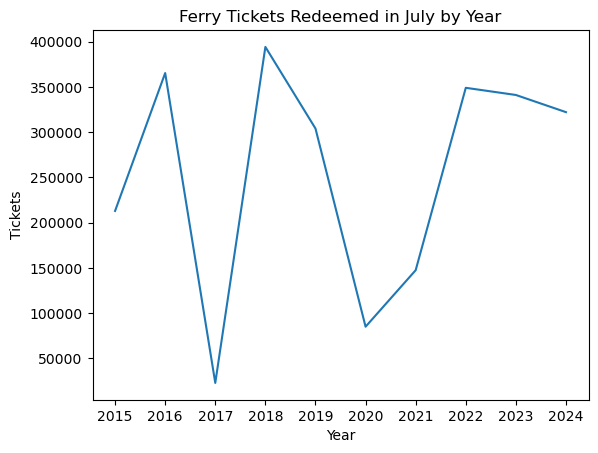

In [27]:
fig = sb.lineplot(x=df3.index, y='Redemption Count', data=df3)
fig.set_xticks(df3.index)
fig.set_title("Ferry Tickets Redeemed in July by Year")
fig.set_xlabel('Year')
fig.set_ylabel('Tickets')
plt.show()